<a href="https://colab.research.google.com/github/li0ne/q-macro/blob/main/economicgrowth_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     year    country  growth_rate  tfp_growth  capital_deepening  tfp_share  \
571  1961  Australia     1.363635   -0.414640           3.651218  -0.304069   
572  1962  Australia     6.278038    2.351975           3.301266   0.374635   
573  1963  Australia     6.751060    2.418411           3.018351   0.358227   
574  1964  Australia     6.324089    1.256359           3.114254   0.198662   
575  1965  Australia     2.230489   -1.892608           2.468253  -0.848517   
576  1966  Australia     6.181824    1.261973           2.712870   0.204143   
577  1967  Australia     5.136991    0.655103           2.913279   0.127527   
578  1968  Australia     7.166123    2.827370           4.258675   0.394547   
579  1969  Australia     7.294846    2.851880           3.427085   0.390944   
580  1970  Australia     3.965998   -0.710917           1.652906  -0.179253   

     capital_share  
571       0.855423  
572       0.173194  
573       0.151251  
574       0.163398  
575       0.353512  
576 

<ipython-input-4-ce7043e54bbb>:69: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


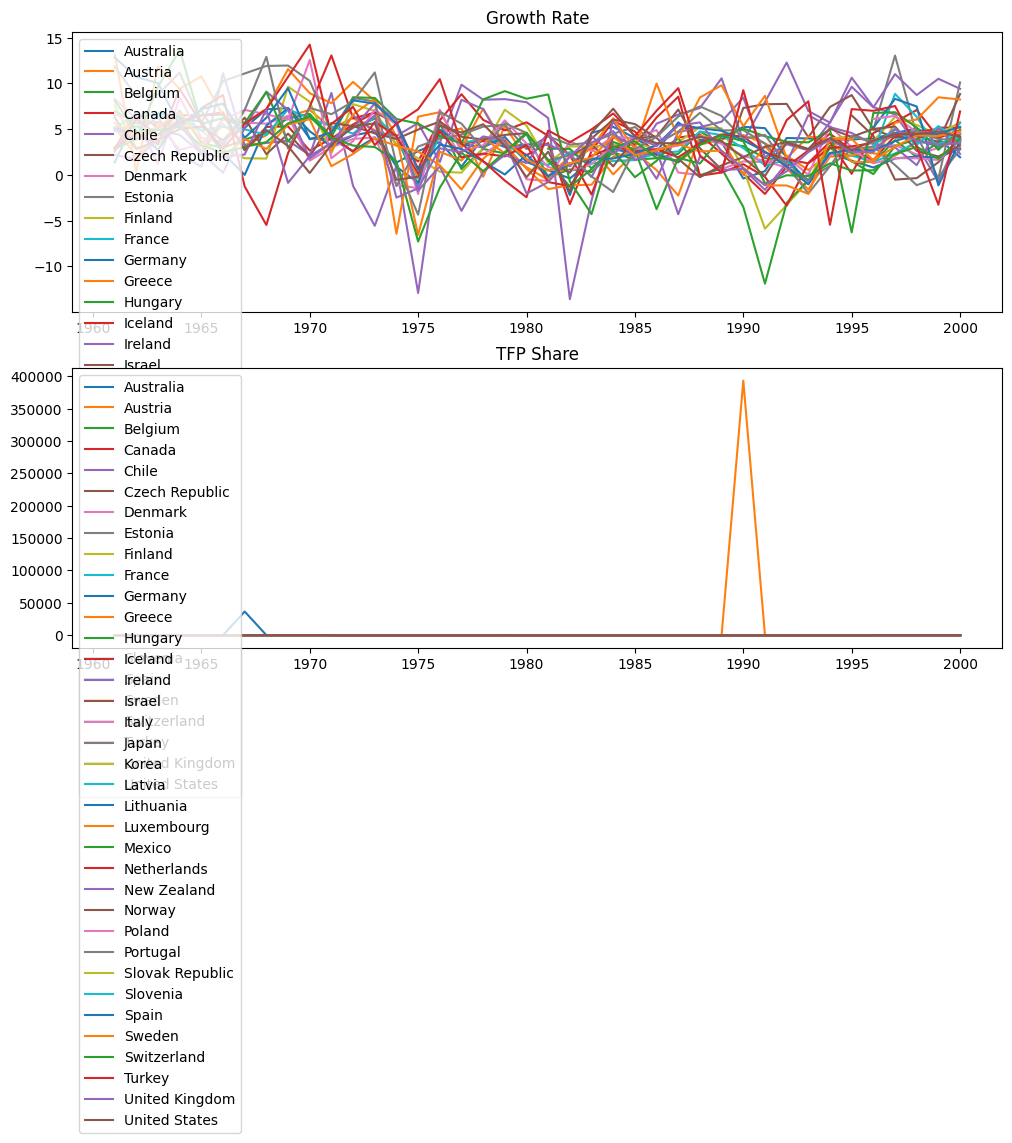

   year countrycode       rgdpna      rkna        pop        emp          avh  \
0  1975         GBR  1139717.125  0.315193  56.152333  24.905455  1814.079593   
1  1976         GBR  1172885.875  0.324569  56.188348  24.778214  1807.024127   
2  1977         GBR  1201712.000  0.333777  56.203595  24.819860  1816.929340   

      labsh    rtfpna     alpha           y_n         hours  tfp_term  \
0  0.551432  0.823299  0.448568  45761.746094  45180.476997  0.702858   
1  0.551432  0.836625  0.448568  47335.367188  44774.829608  0.723623   
2  0.551432  0.839419  0.448568  48417.355469  45095.932685  0.728012   

   cap_term    lab_term  y_n_shifted  tfp_term_shifted  cap_term_shifted  \
0  0.000005  804.605518   100.000000        100.000000        100.000000   
1  0.000005  796.870369   103.438721        102.954407        100.050827   
2  0.000005  802.367405   105.803123        103.578812        100.351974   

   lab_term_shifted  
0        100.000000  
1         99.038641  
2         9

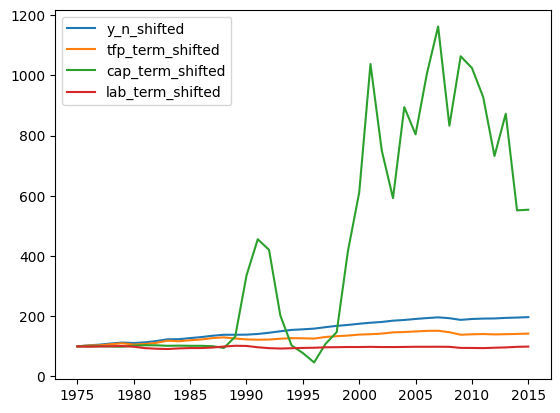

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
pwt1001 = pd.read_stata('https://dataverse.nl/api/access/datafile/354098')


# Select OECD countries
oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
    'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
    'Switzerland', 'Turkey', 'United Kingdom', 'United States'
]

# Filter and select relevant columns
data_all = pwt1001.loc[pwt1001['country'].isin(oecd_countries)][['year', 'country', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data_all = data_all.loc[(data_all['year'] >= 1960) & (data_all['year'] <= 2000)].dropna()

# Calculate additional variables
data_all['alpha'] = 1 - data_all['labsh']
data_all['y_n'] = data_all['rgdpna'] / data_all['emp']  # Y/N
data_all['hours'] = data_all['emp'] * data_all['avh']  # L
data_all['tfp_term'] = data_all['rtfpna'] ** (1 / (1 - data_all['alpha']))  # A^(1/(1-alpha))
data_all['cap_term'] = (data_all['rkna'] / data_all['rgdpna']) ** (data_all['alpha'] / (1 - data_all['alpha']))  # (K/Y)^(alpha/(1-alpha))
data_all['lab_term'] = data_all['hours'] / data_all['pop']  # L/N
data_all = data_all.sort_values(['country', 'year'])

# Calculate growth rates
data_all['growth_rate'] = data_all.groupby('country')['rgdpna'].pct_change() * 100
data_all['tfp_growth'] = data_all.groupby('country')['rtfpna'].pct_change() * 100
data_all['capital_deepening'] = data_all.groupby('country').apply(lambda x: (x['rkna'] / x['hours']).pct_change() * 100).reset_index(level=0, drop=True)

# Calculate TFP Share and Capital Share
data_all['tfp_share'] = data_all['tfp_growth'] / data_all['growth_rate']
data_all['capital_share'] = (data_all['alpha'] * data_all['capital_deepening']) / data_all['growth_rate']

# Remove rows with NaN values resulted from pct_change
data_all = data_all.dropna()

# Create a data panel with the required columns
data_panel = data_all[['year', 'country', 'growth_rate', 'tfp_growth', 'capital_deepening', 'tfp_share', 'capital_share']]

# Print the first 10 rows of the data panel
print(data_panel.head(10))

# Save the data panel to a CSV file
data_panel.to_csv('oecd_growth_data_panel.csv', index=False)

# Plot data (optional)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for country in oecd_countries:
    country_data = data_panel[data_panel['country'] == country]
    plt.plot(country_data['year'], country_data['growth_rate'], label=country)
plt.legend()
plt.title('Growth Rate')

plt.subplot(2, 1, 2)
for country in oecd_countries:
    country_data = data_panel[data_panel['country'] == country]
    plt.plot(country_data['year'], country_data['tfp_share'], label=country)
plt.legend()
plt.title('TFP Share')

plt.tight_layout()
plt.show()








# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1975) & (data['year'] <= 2015)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.head(3))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()
